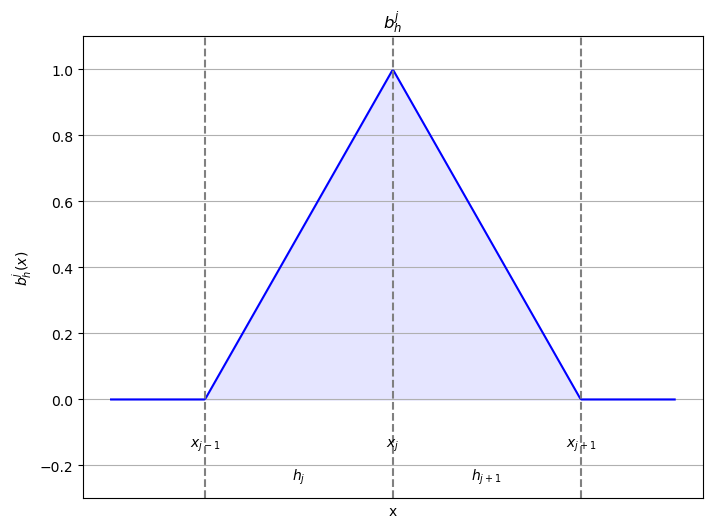

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
h_j = 1.0  # Assuming a uniform grid spacing for simplicity
x_j_minus_1 = 0.0  # Example location for x_{j-1}
x_j = x_j_minus_1 + h_j  # Location for x_j
x_j_plus_1 = x_j + h_j  # Location for x_{j+1}

# Define the tent function
def b_h_j(x):
    if x_j_minus_1 <= x <= x_j:
        return (x - x_j_minus_1) / h_j
    elif x_j <= x <= x_j_plus_1:
        return (x_j_plus_1 - x) / h_j
    else:
        return 0.0

# Generate values
x_values = np.linspace(x_j_minus_1 - 0.5*h_j, x_j_plus_1 + 0.5*h_j, 400)
y_values = [b_h_j(x) for x in x_values]
# Adjusting the plot to hide x-axis ticks and only maintain the x and h notation


plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, color='blue')
plt.axvline(x_j_minus_1, linestyle='--', color='grey')
plt.axvline(x_j, linestyle='--', color='grey')
plt.axvline(x_j_plus_1, linestyle='--', color='grey')
plt.fill_between(x_values, y_values, color='blue', alpha=0.1)

# Annotations for x_j, x_{j+1}
plt.annotate(r'$x_{j-1}$', (x_j_minus_1, -0.1), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=10)
plt.annotate(r'$x_j$', (x_j, -0.1), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=10)
plt.annotate(r'$x_{j+1}$', (x_j_plus_1, -0.1), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=10)

# Annotations for h_j, h_{j+1}
plt.annotate(r'$h_j$', (x_j_minus_1 + h_j/2, -0.2), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=10)
plt.annotate(r'$h_{j+1}$', (x_j + h_j/2, -0.2), textcoords="offset points", xytext=(0,-10), ha='center', fontsize=10)

plt.title(r"$b_h^j$")
plt.xlabel("x")
plt.ylabel(r"$b_h^j(x)$")
plt.grid(True)
plt.ylim(-0.3, 1.1)  # Adjusting y limits for clarity
plt.xticks([])  # Hide x-axis ticks
plt.gca().set_facecolor((0, 0, 0, 0))  # RGBA, where A=0 means transparent
plt.gcf().patch.set_alpha(0.0)
plt.savefig("tent_function.svg")

(5044, 2)
(5044,)
(5044,)


ValueError: Argument Z must be 2-dimensional.

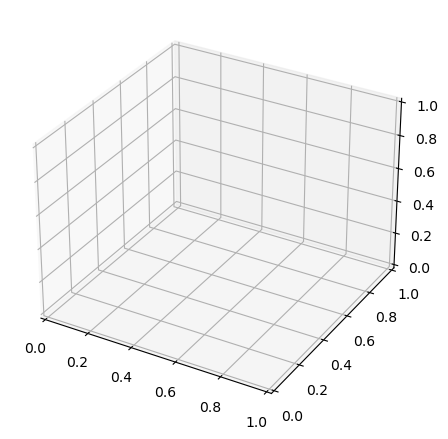

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
# Updating the function to compute barycentric coordinates for a point P in a canonical triangle ABC


x = np.stack(np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100)),-1).reshape(-1, 2)
x = x[x[:,0]+x[:,1]<=1]
lambda1 = x[:, 0] 
lambda2 = x[:, 1]
lambda3 = 1 - x[:, 0] - x[:, 1]
print(x.shape)
print(lambda1.shape)

# 3D Visualization of Barycentric Coordinates for Canonical Triangle

fig = plt.figure(figsize=(18, 6))

# Plot for lambda_A
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(x[:, 0], x[:, 1], lambda1, cmap="red", edgecolor='none', alpha=0.8)
ax1.set_title(r"$\lambda_1$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
ax1.set_zlabel(r"$\lambda_1$")
ax1.view_init(30, 45)

# Plot for lambda_B
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(x[:, 0], x[:, 1], lambda2, cmap='jet', edgecolor='none', alpha=0.8)
ax2.set_title(r"$\lambda_2$")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_zlabel(r"$\lambda_2$")
ax2.view_init(30, 45)

# Plot for lambda_C
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(x[:,0], x[:,1], lambda3, cmap='jet', edgecolor='none', alpha=0.8)
ax3.set_title(r"$\lambda_3$")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
ax3.set_zlabel(r"$\lambda_3$")
ax3.view_init(30, 45)

plt.tight_layout()
plt.show()